In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# Loading the data set

In [3]:
df = pd.read_csv('dataset[652].csv')

In [4]:
df.head()

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158


# Checking for missing/Null values

In [5]:
df.isnull().sum()

Humidity       0
Temperature    0
dtype: int64

no none values present.

In [6]:
df.isna().sum()

Humidity       0
Temperature    0
dtype: int64

no na values present.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     300 non-null    float64
 1   Temperature  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


# Some statistics of the data

In [8]:
df.describe()

,Humidity,Temperature
count,300.000000,300.000000
mean,0.535887,14.981862
std,0.169164,11.144964
min,0.000000,-21.684834
25%,0.424500,8.290974
50%,0.537120,14.907001
75%,0.649772,22.408376
max,1.000000,43.825049


# Splitting of Dataset

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8, test_size = 0.2, random_state = 32) # here test size is 20% of original dataset

In [10]:
df_train.head()

,Humidity,Temperature
156,0.187995,36.457018
294,0.455106,17.081201
184,0.542374,16.613381
130,0.615996,12.977813
15,0.556324,18.576819


In [11]:
df_test.head()

,Humidity,Temperature
265,0.473704,26.027498
255,0.562434,9.664922
286,0.928479,-4.872044
19,0.485101,16.762489
212,0.473949,14.142821


# Plotting

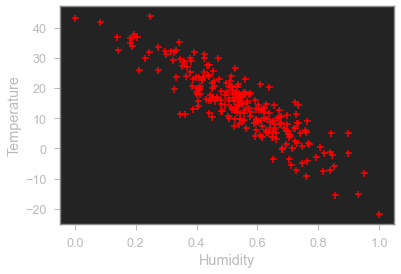

In [12]:
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.scatter(df_train.Humidity, df_train.Temperature, color='red',marker='+')

In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df_train[['Humidity']].values, df_train.Temperature)

LinearRegression()

In [14]:
reg.predict([[0.4]]) # testing a random value

array([22.97569844])

# The Relationship

In [15]:
reg.coef_

array([-59.25588616])

In [16]:
reg.intercept_

46.67805289888122

In [17]:
print("The relationship is : Temperature = ", float(reg.coef_)," * Humidity + ",reg.intercept_ )

The relationship is : Temperature =  -59.25588615970043  * Humidity +  46.67805289888122


 ## The best fit line

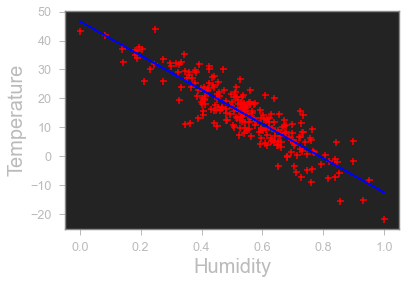

In [18]:
plt.xlabel('Humidity', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.scatter(df_train.Humidity, df_train.Temperature, color='red',marker='+')
plt.plot(df_train.Humidity, reg.predict(df_train[['Humidity']].values), color='blue')

This is the best-fit line.

# Prediction from test data

In [19]:
pred = reg.predict(df_test[['Humidity']].values)

## Checking Accuracy

In [20]:
from sklearn.metrics import mean_squared_error


In [21]:
print("Model Report")
print("MSE:", mean_squared_error(df_test['Temperature'].values, pred))


Model Report
MSE: 26.92354337018343
